# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [19]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
# print(newsgroups_train)

In [5]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [6]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [7]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)

  return review_embedding




In [8]:
len(newsgroups_train.data)

11314

In [9]:
# X, y = 
X =[]
y=[]
cnt=0
for each in newsgroups_train.data:
  article_embedding = get_review_embedding(each)
  X.append(article_embedding)
  # cnt+=1
  # if(cnt==2):
  #   break
y = newsgroups_train.target

In [10]:
X=np.array(X)
y=np.array(y)
# X.shape
# y

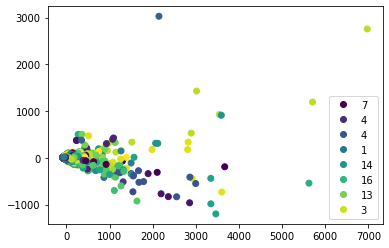

In [11]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(newsgroups_train.target))
plt.show()



# K_Means Algorithm


In [12]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score as myscore

kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
kmeans.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

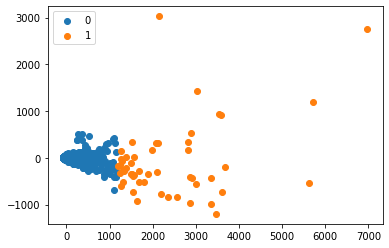

In [13]:
#code for visualisation of clusters
u_labels = np.unique(kmeans.labels_)
for i in u_labels:
    plt.scatter(Xt[kmeans.labels_ == i , 0] , Xt[kmeans.labels_ == i , 1] , label = i)
plt.legend()
plt.show()




# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







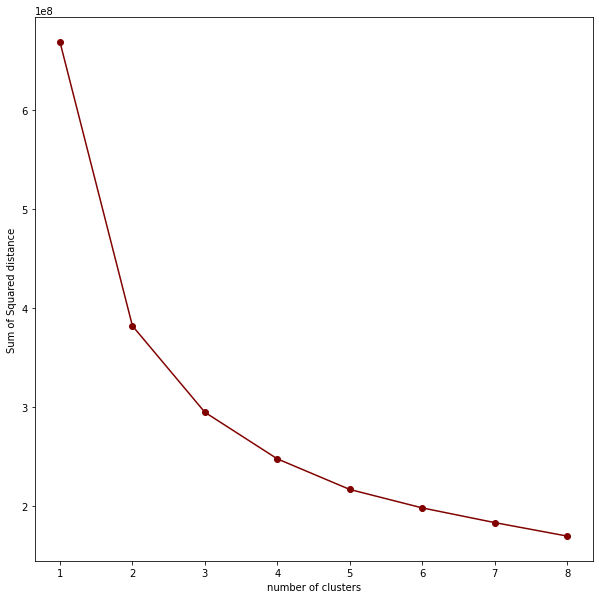

In [14]:
def elbow_method():
  sum_sqa_err = []
  for k in range(1, 9):
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_sqa_err.append(km.inertia_)

  plt.figure(figsize=(10, 10))
  plt.plot(range(1, 9), sum_sqa_err, '-o', c = 'maroon')
  plt.xlabel('number of clusters')
  plt.ylabel('Sum of Squared distance')

elbow_method()


# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




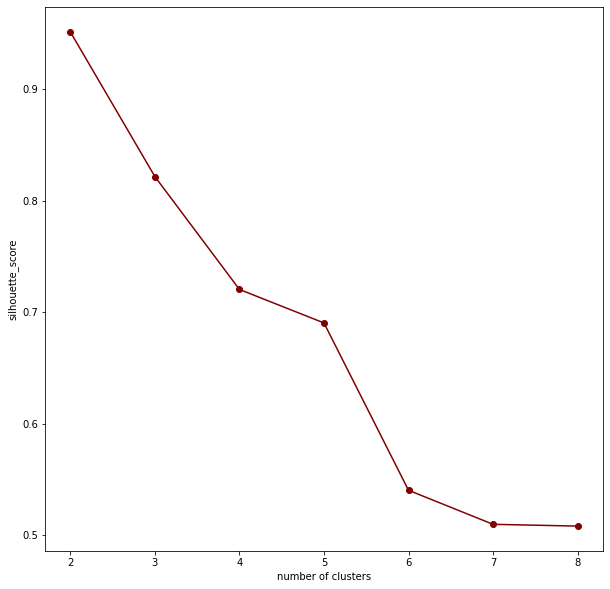

In [15]:
def silhouette_score():
  score = []
  for k in range(2, 9):
    km = KMeans(n_clusters=k)
    pred= km.fit(X)
    thatscore = sklearn.metrics.silhouette_score(X, km.labels_,metric='euclidean')
    score.append(thatscore)

  plt.figure(figsize=(10, 10))
  plt.plot(range(2, 9), score, '-o', c = 'maroon')
  plt.xlabel('number of clusters')
  plt.ylabel('silhouette_score')

silhouette_score()

  



By Elbow method and silhouette_score, it is clear that optimal value of clustes(i.e. the value of k) is 2.

# Agglomerative clustering

In [16]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def AgglomerativeClustering1():
  clustering = AgglomerativeClustering().fit(X)
  clustering.labels_
  u_labels = np.unique(clustering.labels_)
  for i in u_labels:
    plt.scatter(Xt[kmeans.labels_ == i , 0] , Xt[kmeans.labels_ == i , 1] , label = i)
  plt.legend()
  plt.show()


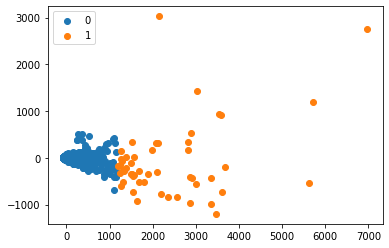

In [17]:
#code for visualisation of clusters

AgglomerativeClustering1()




# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



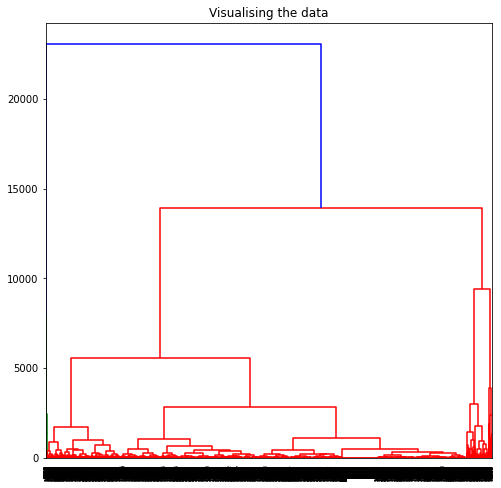

In [20]:
# code to write dendogram

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

import scipy.cluster.hierarchy as shc
import pandas as pd
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))





By looking at the above dendogram, it is clear that optimal number of clusters are 2.

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


